## Implementing Polynomial Ridge Regression on simulated data

### Importing the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

### Generating a data sample and preprocessing the data

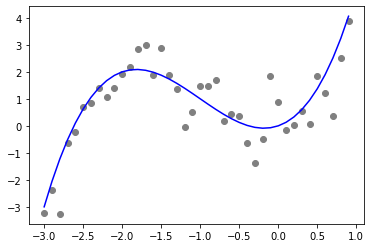

In [2]:
# Generating x and y
x = np.arange(-3,1,0.1)
random_errors = np.random.normal(0,1,40)
y = x**3 + 3*x**2 + x + random_errors
z = x**3 + 3*x**2 + x

# plotting the generated dataset
plt.scatter(x,y, c='grey')
plt.plot(x,z, c='b')
plt.show()

# preparation to fit the polynomial model
poly = PolynomialFeatures(degree=3, include_bias=True)
poly_features = poly.fit_transform(x.reshape(-1, 1))

### Fitting the model and plotting the results

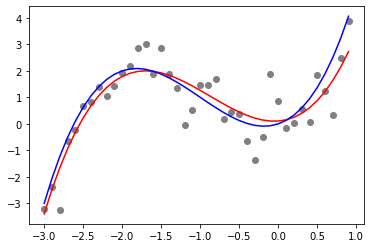

In [3]:
# fit the model
model = Ridge(alpha=1)
model.fit(poly_features, y)
y_pred = model.predict(poly_features)

# plot the results
plt.scatter(x,y, c='grey')
plt.plot(x,y_pred,c='red')
plt.plot(x,z, c='b')
plt.show()

### Investigating the effect of Alpha

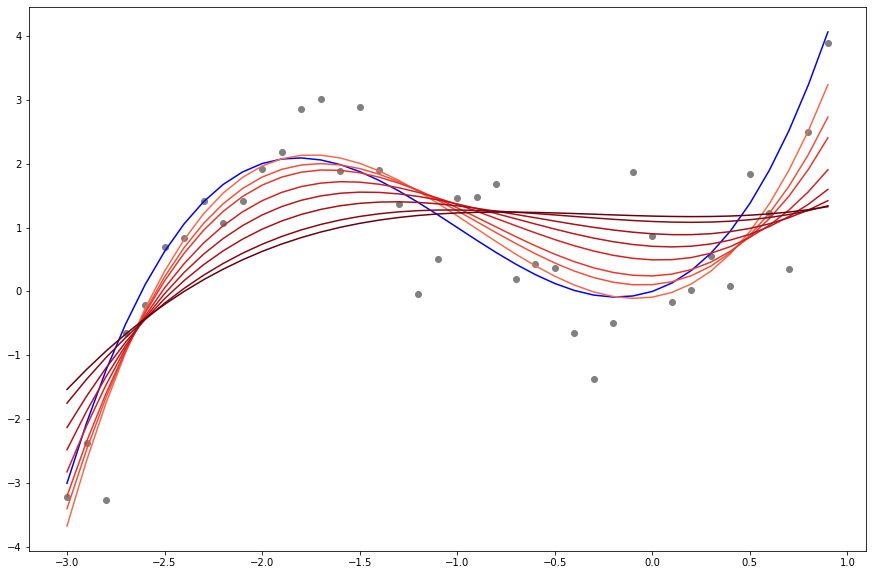

In [4]:
alphas = [0,1,2,5,10,20,50,100]

fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(x,y, c='grey')
plt.plot(x,z, c='b')
colors = plt.cm.Reds(np.linspace(0.5,1,len(alphas)))
for i, col in zip(alphas, range(len(alphas))):
    model = Ridge(alpha=[i])
    model.fit(poly_features, y)
    y_pred = model.predict(poly_features)

    plt.plot(x,y_pred, c=colors[col])
plt.show()

A darker red corresponds to a higher value of alpha, the blue line is the function used to generate the data set.

It's clear that increasing alpha flattens the regression curve. in other words, a curve with a higher value for alpha is less susceptible to extreme values in the data set and might therefor be more generalisble to new samples (less chance of overfitting). It is, however, also clear that the darker estimated curves are further away from the true blue curve, which means that a higher alpha introduces more bias.